<a href="https://colab.research.google.com/github/ASREETHASREEJA5/Deep-Learning/blob/main/ANN_and_CNN_for_hand_written_number_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets,layers,models
from matplotlib import pyplot as pt

In [38]:
(x_tr, y_tr) , (x_te, y_te) = keras.datasets.mnist.load_data()

In [8]:
x_tr.shape

(60000, 28, 28)

In [16]:
y_tr[0]

5

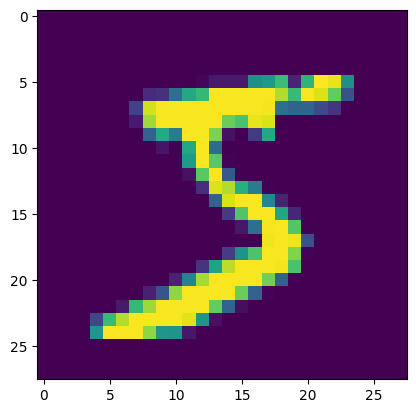

In [15]:
pt.imshow(x_tr[0])

In [39]:
x_tr = x_tr/255
x_te = x_te/255

In [19]:
x_tr.shape

(60000, 28, 28)

ANN MODEL

In [20]:
ann = models.Sequential([
    layers.Flatten(input_shape = (28,28)),
    layers.Dense(100,activation = 'relu'),
    layers.Dense(10,activation = 'sigmoid')
])

ann.compile(optimizer = 'adam',
           loss = 'sparse_categorical_crossentropy',
           metrics = ['accuracy'])

ann.fit(x_tr,y_tr,epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2713 - accuracy: 0.9226
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1226 - accuracy: 0.9640
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0855 - accuracy: 0.9744
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0646 - accuracy: 0.9804
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0507 - accuracy: 0.9844


In [21]:
ann.evaluate(x_te,y_te)

313/313 [==============================] - 2s 6ms/step - loss: 0.0833 - accuracy: 0.9731


[0.08331374824047089, 0.9731000065803528]

In [23]:
y_pred = ann.predict(x_te)
y_pred[0]

313/313 [==============================] - 1s 2ms/step


array([3.5775327e-03, 1.6378751e-04, 3.2151151e-01, 9.6118402e-01,
       3.7690072e-07, 8.0986559e-02, 5.1060653e-07, 9.9998987e-01,
       7.1262307e-02, 2.4422778e-01], dtype=float32)

In [24]:
y_classes = [np.argmax(ele) for ele in y_pred]
y_classes[:5]

[7, 2, 1, 0, 4]

In [25]:
y_te[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_te,y_classes))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.96      0.97      1032
           3       0.97      0.97      0.97      1010
           4       0.96      0.98      0.97       982
           5       0.96      0.98      0.97       892
           6       0.99      0.96      0.98       958
           7       0.96      0.98      0.97      1028
           8       0.97      0.95      0.96       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



CNN MODEL

In [41]:
x_tr = x_tr.reshape(-1,28,28,1)
x_tr.shape

(60000, 28, 28, 1)

In [42]:
x_te = x_te.reshape(-1,28,28,1)
x_te.shape

(10000, 28, 28, 1)

In [48]:
cnn = models.Sequential([
    layers.Conv2D(filters =30 ,kernel_size =(3,3),activation = 'relu',input_shape = (28,28,1)),
    layers.MaxPooling2D((2,2)),

    #dense
    layers.Flatten(),
    layers.Dense(100,activation = 'relu'),
    layers.Dense(10,activation = 'sigmoid')
])

cnn.compile(optimizer = 'adam',
           loss = 'sparse_categorical_crossentropy',
           metrics = ['accuracy'])

cnn.fit(x_tr,y_tr,epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 54s 27ms/step - loss: 0.1591 - accuracy: 0.9519
Epoch 2/5
1875/1875 [==============================] - 40s 22ms/step - loss: 0.0554 - accuracy: 0.9840
Epoch 3/5
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0369 - accuracy: 0.9882
Epoch 4/5
1875/1875 [==============================] - 35s 18ms/step - loss: 0.0248 - accuracy: 0.9922
Epoch 5/5
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0169 - accuracy: 0.9945


In [49]:
cnn.evaluate(x_te,y_te)

313/313 [==============================] - 2s 6ms/step - loss: 0.0436 - accuracy: 0.9871


[0.04361681640148163, 0.9871000051498413]

In [51]:
y_pred = cnn.predict(x_te)
y_pred[0]

313/313 [==============================] - 4s 12ms/step


array([7.6324403e-02, 2.2031802e-01, 4.1465238e-02, 8.1928718e-01,
       1.1723152e-02, 1.7720483e-03, 2.4464572e-07, 9.9999893e-01,
       4.9413916e-02, 1.5428996e-01], dtype=float32)

In [52]:
y_p = [np.argmax(ele) for ele in y_pred]
y_p[0]

7

In [54]:
from sklearn.metrics import classification_report
print(classification_report(y_te,y_p))



              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       1.00      0.97      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.98       892
           6       0.99      0.98      0.99       958
           7       0.98      0.99      0.99      1028
           8       0.99      0.98      0.99       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

